In [171]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [172]:
for i in range(55):
    if i==0:  #SNLI/TRAIN10000/TRAIN
        train = pd.read_pickle('salida/nuevo4j/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4j/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [173]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.242375,2.156780,2.121928,3.793043,0.004627,0.226893,0.082562,0.459024,0.459024,4.251276,...,2,5,0.250000,0.315587,0,,0,,0.50,neutral
1,1.364151,1.543752,0.721928,3.899752,0.005008,0.069533,0.027793,0.183083,0.183083,4.157277,...,1,5,0.000000,0.315462,0,,0,,0.25,contradiction
2,1.354370,1.640224,1.370951,3.895909,0.004943,0.082896,0.034248,0.243614,0.243614,4.438309,...,1,5,0.333333,0.335940,0,,0,,1.00,entailment
3,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.292915,...,0,4,0.000000,0.000000,0,,0,,0.00,neutral
4,1.365683,1.405639,1.000000,3.869048,0.004221,0.067400,0.046895,0.146527,0.146527,4.324714,...,1,4,0.500000,0.207519,0,,0,,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,1.000007,1.356343,0.918296,3.782035,0.005270,0.091182,0.023234,0.226795,0.226795,3.942525,...,3,4,0.500000,0.275025,0,,0,,0.00,contradiction
549363,1.000019,1.314536,0.934068,3.824551,0.004792,0.074340,0.027256,0.472310,0.472310,4.107884,...,5,4,0.222222,0.205631,0,,0,,1.00,neutral
549364,1.290847,2.015061,1.384432,3.624098,0.006082,0.166868,0.019184,0.149308,0.149308,4.071102,...,2,6,0.400000,0.424965,0,,0,,0.50,neutral
549365,1.400297,1.603158,0.650022,3.759164,0.005035,0.019566,-0.022532,0.052036,0.052036,3.909436,...,1,6,0.500000,0.312112,0,,0,,0.25,contradiction


In [174]:
# train.head(20)

In [175]:
# train[train["clases"]=="contradiction"]

In [176]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
#train["meartsx"]=train["mearts"]*train["distancias"]

In [177]:
#train.boxplot(by="clases",column=["meartsx","mearts"])

<Axes: title={'center': 'list_comp'}, xlabel='clases'>

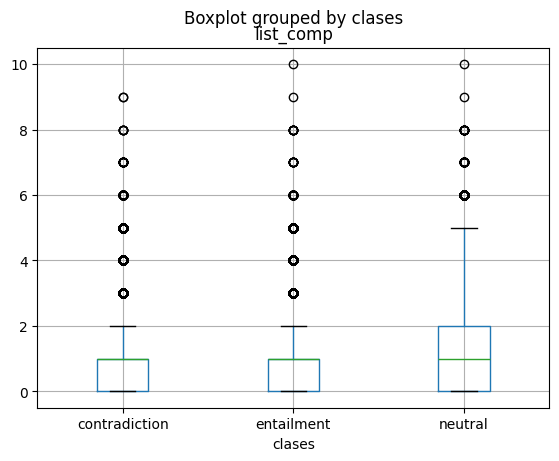

In [178]:
train.boxplot(by="clases",column=["list_comp"])

In [179]:
checar=["distancias"]

In [180]:
import scipy.stats as stats
for c in checar:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="neutral")][c]
    grupo_b = train[(train['clases']=="entailment")][c]
    grupo_c = train[(train['clases']=="contradiction")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-entailment")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-entailment")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_b, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"entailment-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"entailment-contradiction")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-contradiction")

Hay una diferencia significativa entre los grupos. distancias 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. distancias 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. distancias 1.2722481514928337e-117 neutral-contradiction


In [181]:
for c in checar:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="neutral")][c]
    grupo_b = train[(train['clases']=="entailment")][c]
    grupo_c = train[(train['clases']=="contradiction")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.mannwhitneyu(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-entailment")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-entailment")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_b, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"entailment-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"entailment-contradiction")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-contradiction")

Hay una diferencia significativa entre los grupos. distancias 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. distancias 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. distancias 1.2722481514928337e-117 neutral-contradiction


In [182]:
train = train[['entail','contra','negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]


In [183]:
# train=train.drop(["verbT","verbH"],axis=1)

In [184]:
train.columns

Index(['entail', 'contra', 'negH', 'negT', 'mutinf', 'max_info', 'list_comp',
       'list_incomp', 'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

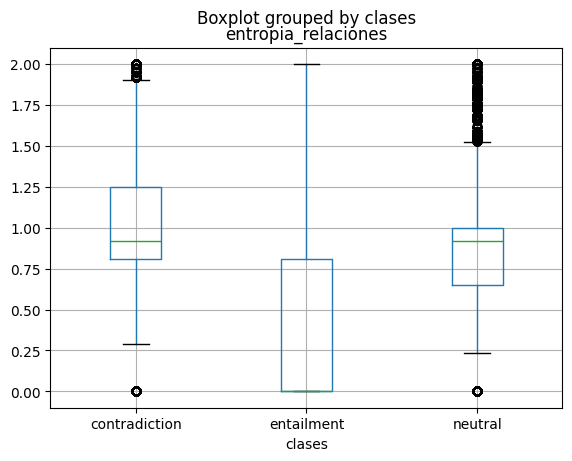

In [185]:
train.boxplot(by="clases",column="entropia_relaciones")

## Eliminar características

In [186]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["verbH","verbT","entropias","list_m","distancias"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0.500000,0.000000,0,0,0.458233,0.386554,0,0,0,0.400000,1.000000,0.459024,0.50,0.250000,neutral
1,0.500000,0.000000,0,0,0.257524,0.234134,1,0,1,0.200000,1.500000,0.183083,0.25,0.000000,contradiction
2,0.666667,0.000000,0,0,0.542400,0.611403,0,0,0,0.200000,0.918296,0.243614,1.00,0.333333,entailment
3,0.500000,0.500000,0,0,4.292915,0.763564,0,1,0,0.000000,1.000000,0.000000,0.00,0.000000,neutral
4,0.500000,0.000000,0,0,0.455666,0.466300,0,0,0,0.250000,1.000000,0.146527,0.00,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,0.500000,0.000000,0,0,0.160490,0.318630,2,0,0,0.750000,1.000000,0.226795,0.00,0.500000,contradiction
549363,0.333333,0.111111,0,0,0.283333,0.324781,0,1,0,1.250000,1.351644,0.472310,1.00,0.222222,neutral
549364,0.400000,0.200000,0,0,0.447004,0.481694,0,1,0,0.333333,1.521928,0.149308,0.50,0.400000,neutral
549365,0.833333,0.000000,0,0,0.150272,0.256990,4,0,0,0.166667,0.650022,0.052036,0.25,0.500000,contradiction


In [187]:
train.columns

Index(['entail', 'contra', 'negH', 'negT', 'mutinf', 'max_info', 'list_comp',
       'list_incomp', 'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

In [188]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [189]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [190]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [191]:
train_m

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
entail,1.000000,-0.452068,-0.039584,-0.001794,0.652676,0.732620,0.201113,-0.425629,-0.327442,-0.591400,-0.813868,0.690969,0.452581,0.568943
contra,-0.452068,1.000000,-0.021387,-0.002733,0.035226,-0.151909,-0.112480,0.904987,-0.055953,-0.072372,0.419673,-0.512508,-0.209955,-0.247365
negH,-0.039584,-0.021387,1.000000,0.038183,-0.090311,-0.055916,0.021582,-0.012802,-0.004533,0.085837,0.050510,-0.041193,-0.025058,-0.015339
negT,-0.001794,-0.002733,0.038183,1.000000,-0.003437,-0.001317,-0.000163,-0.003483,0.001935,-0.004558,0.000165,0.001894,-0.004439,-0.000064
mutinf,0.652676,0.035226,-0.090311,-0.003437,1.000000,0.790736,-0.060229,-0.023746,-0.017351,-0.719074,-0.679710,0.520382,0.349809,0.377287
max_info,0.732620,-0.151909,-0.055916,-0.001317,0.790736,1.000000,-0.316464,-0.172070,-0.156785,-0.598549,-0.662866,0.507286,0.619386,0.556218
list_comp,0.201113,-0.112480,0.021582,-0.000163,-0.060229,-0.316464,1.000000,-0.033539,0.003219,-0.031449,-0.057017,0.047765,-0.390818,-0.056548
list_incomp,-0.425629,0.904987,-0.012802,-0.003483,-0.023746,-0.172070,-0.033539,1.000000,-0.018938,-0.013630,0.478318,-0.509484,-0.198131,-0.209847
rel_conceptuales,-0.327442,-0.055953,-0.004533,0.001935,-0.017351,-0.156785,0.003219,-0.018938,1.000000,-0.007584,0.417319,-0.173071,-0.160620,-0.168446
diferencias,-0.591400,-0.072372,0.085837,-0.004558,-0.719074,-0.598549,-0.031449,-0.013630,-0.007584,1.000000,0.467045,-0.347779,-0.259196,-0.337213


<Axes: >

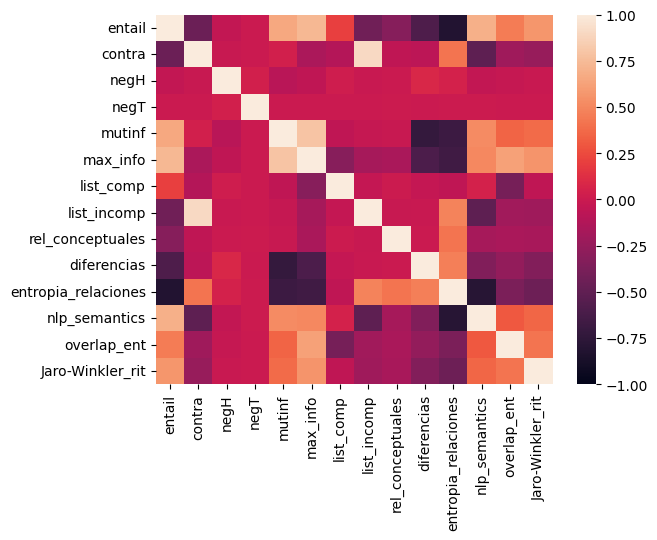

In [192]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [193]:
train_m

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
entail,1.000000,-0.452068,-0.039584,-0.001794,0.652676,0.732620,0.201113,-0.425629,-0.327442,-0.591400,-0.813868,0.690969,0.452581,0.568943
contra,-0.452068,1.000000,-0.021387,-0.002733,0.035226,-0.151909,-0.112480,0.904987,-0.055953,-0.072372,0.419673,-0.512508,-0.209955,-0.247365
negH,-0.039584,-0.021387,1.000000,0.038183,-0.090311,-0.055916,0.021582,-0.012802,-0.004533,0.085837,0.050510,-0.041193,-0.025058,-0.015339
negT,-0.001794,-0.002733,0.038183,1.000000,-0.003437,-0.001317,-0.000163,-0.003483,0.001935,-0.004558,0.000165,0.001894,-0.004439,-0.000064
mutinf,0.652676,0.035226,-0.090311,-0.003437,1.000000,0.790736,-0.060229,-0.023746,-0.017351,-0.719074,-0.679710,0.520382,0.349809,0.377287
max_info,0.732620,-0.151909,-0.055916,-0.001317,0.790736,1.000000,-0.316464,-0.172070,-0.156785,-0.598549,-0.662866,0.507286,0.619386,0.556218
list_comp,0.201113,-0.112480,0.021582,-0.000163,-0.060229,-0.316464,1.000000,-0.033539,0.003219,-0.031449,-0.057017,0.047765,-0.390818,-0.056548
list_incomp,-0.425629,0.904987,-0.012802,-0.003483,-0.023746,-0.172070,-0.033539,1.000000,-0.018938,-0.013630,0.478318,-0.509484,-0.198131,-0.209847
rel_conceptuales,-0.327442,-0.055953,-0.004533,0.001935,-0.017351,-0.156785,0.003219,-0.018938,1.000000,-0.007584,0.417319,-0.173071,-0.160620,-0.168446
diferencias,-0.591400,-0.072372,0.085837,-0.004558,-0.719074,-0.598549,-0.031449,-0.013630,-0.007584,1.000000,0.467045,-0.347779,-0.259196,-0.337213


In [194]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
entail,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
contra,-0.452068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
negH,-0.039584,-0.021387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
negT,-0.001794,-0.002733,0.038183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf,0.652676,0.035226,-0.090311,-0.003437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info,0.732620,-0.151909,-0.055916,-0.001317,0.790736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_comp,0.201113,-0.112480,0.021582,-0.000163,-0.060229,-0.316464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_incomp,-0.425629,0.904987,-0.012802,-0.003483,-0.023746,-0.172070,-0.033539,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
rel_conceptuales,-0.327442,-0.055953,-0.004533,0.001935,-0.017351,-0.156785,0.003219,-0.018938,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
diferencias,-0.591400,-0.072372,0.085837,-0.004558,-0.719074,-0.598549,-0.031449,-0.013630,-0.007584,0.000000,0.000000,0.000000,0.00000,0.0


In [195]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

max_info entail 0.7326202365928471
max_info mutinf 0.7907363885416683
list_incomp contra 0.9049866635345218


In [196]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

diferencias mutinf -0.7190737791945762
entropia_relaciones entail -0.813868451408884
nlp_semantics entropia_relaciones -0.7951434457600053


In [197]:
# Checar variables colineales
#sns.relplot(data=train_m, x="distancias", y="diferencias")

In [198]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [199]:
# SICK
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    elif i == "neutral":
        y_train.append(2)
    else:
        y_train.append(0)

In [200]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

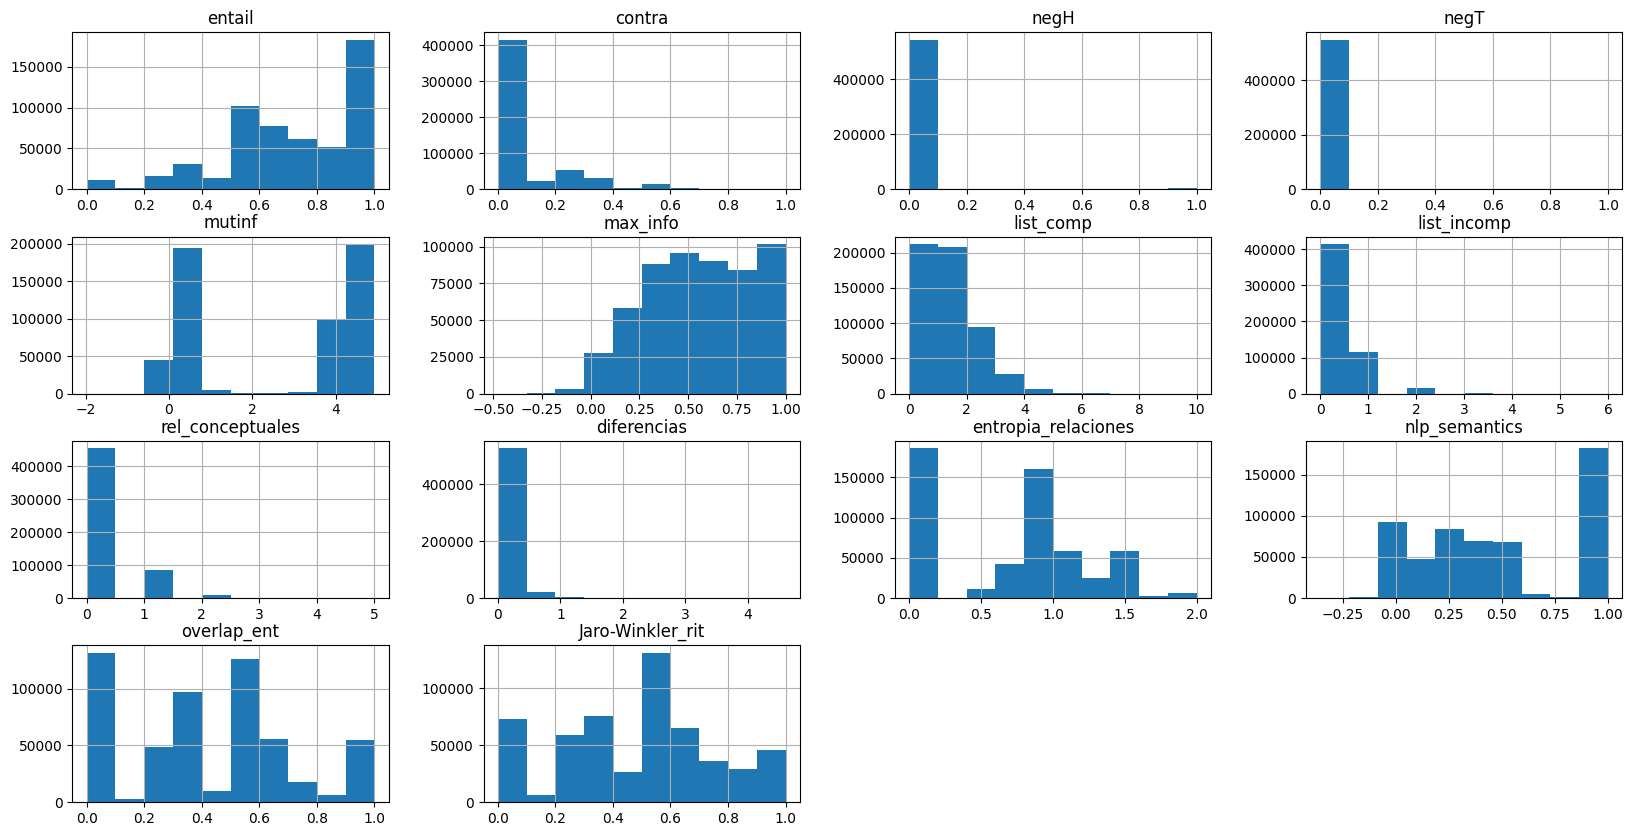

In [201]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [202]:
for i in range(10):
    if i==0:
        test = pd.read_pickle('salida/nuevo4j/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4j/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [203]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.340658,1.510203,1.198117,3.726673,0.005458,0.101188,0.021111,0.386586,0.386586,3.927563,...,2,7,0.250000,0.215019,0,,0,,0.250000,neutral
1,1.351523,2.506144,1.378783,3.683948,0.004802,0.086685,0.023502,0.198758,0.198758,4.265780,...,1,7,0.333333,0.635840,0,,0,,0.500000,entailment
2,1.266022,2.014034,1.378783,3.676046,0.004048,0.198506,0.045497,0.072066,0.072066,3.913399,...,1,7,0.250000,0.246940,0,,0,,0.333333,contradiction
3,0.000000,1.491315,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.381176,...,0,8,0.000000,0.000000,0,,0,,0.500000,neutral
4,0.000000,1.439676,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.413306,...,0,8,0.333333,0.000000,0,,0,,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.284206,2.121928,1.000000,3.864398,0.004332,0.175336,0.133268,0.447986,0.447986,4.233124,...,1,4,0.200000,1.321928,0,,0,,0.333333,contradiction
9814,0.000000,1.947339,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.141572,...,0,4,0.000000,0.000000,0,,0,,0.333333,entailment
9815,1.353333,1.413582,0.811278,3.787320,0.004292,0.084199,0.030675,0.245040,0.245040,4.086125,...,2,8,0.333333,0.197276,0,,0,,0.333333,contradiction
9816,0.000000,1.956908,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.673955,...,0,8,0.666667,0.000000,0,,0,,1.000000,entailment


In [204]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [205]:
test=test.drop(["verbT","verbH"],axis=1)

In [206]:
test = test[['entail','contra','negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]
test

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0.500000,0.000000,0,0,0.200890,0.208485,1,0,0,0.285714,1.000000,0.386586,0.250000,0.250000,neutral
1,0.666667,0.000000,0,0,0.581832,0.608876,0,0,0,0.142857,0.918296,0.198758,0.500000,0.333333,entailment
2,0.250000,0.250000,0,0,0.237352,0.194148,0,1,1,0.142857,2.000000,0.072066,0.333333,0.250000,contradiction
3,1.000000,0.000000,0,0,4.381176,0.644971,1,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,neutral
4,0.666667,0.333333,0,0,4.413306,0.778108,0,1,0,0.000000,0.918296,0.000000,0.500000,0.333333,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.400000,0.000000,0,0,0.368725,0.359657,0,0,2,0.250000,1.521928,0.447986,0.333333,0.200000,contradiction
9814,1.000000,0.000000,0,0,4.141572,0.700668,2,0,0,0.000000,0.000000,1.000000,0.333333,0.000000,entailment
9815,0.333333,0.000000,0,0,0.298806,0.305267,0,0,0,0.250000,0.918296,0.245040,0.333333,0.333333,contradiction
9816,1.000000,0.000000,0,0,4.673955,1.000000,0,0,0,0.000000,0.000000,1.000000,1.000000,0.666667,entailment


In [207]:
test[test["clases"]=="contradiction"]

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
2,0.250000,0.250000,0,0,0.237352,0.194148,0,1,1,0.142857,2.000000,0.072066,0.333333,0.250000,contradiction
5,0.500000,0.500000,0,0,4.440310,0.539767,0,1,0,0.000000,1.000000,0.000000,0.000000,0.000000,contradiction
8,0.666667,0.333333,0,0,4.139124,0.659479,1,1,0,0.000000,0.918296,0.000000,0.250000,0.333333,contradiction
11,0.250000,0.000000,0,0,0.203538,0.235751,0,0,1,0.500000,1.500000,0.301306,0.250000,0.250000,contradiction
14,0.250000,0.250000,0,0,0.187236,0.305140,0,1,1,0.250000,2.000000,0.243431,0.333333,0.250000,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,0.666667,0.000000,0,0,4.449800,0.765826,0,0,1,0.000000,0.918296,0.500000,0.666667,0.000000,contradiction
9807,0.400000,0.000000,0,0,4.108551,0.518640,0,0,3,0.000000,0.970951,0.500000,0.250000,0.600000,contradiction
9810,0.250000,0.250000,0,0,-0.025005,0.078521,1,1,0,0.250000,1.500000,0.314533,0.000000,0.250000,contradiction
9813,0.400000,0.000000,0,0,0.368725,0.359657,0,0,2,0.250000,1.521928,0.447986,0.333333,0.200000,contradiction


In [208]:
test.columns

Index(['entail', 'contra', 'negH', 'negT', 'mutinf', 'max_info', 'list_comp',
       'list_incomp', 'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

In [209]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
test

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0.500000,0.000000,0,0,0.200890,0.208485,1,0,0,0.285714,1.000000,0.386586,0.250000,0.250000,neutral
1,0.666667,0.000000,0,0,0.581832,0.608876,0,0,0,0.142857,0.918296,0.198758,0.500000,0.333333,entailment
2,0.250000,0.250000,0,0,0.237352,0.194148,0,1,1,0.142857,2.000000,0.072066,0.333333,0.250000,contradiction
3,1.000000,0.000000,0,0,4.381176,0.644971,1,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,neutral
4,0.666667,0.333333,0,0,4.413306,0.778108,0,1,0,0.000000,0.918296,0.000000,0.500000,0.333333,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.400000,0.000000,0,0,0.368725,0.359657,0,0,2,0.250000,1.521928,0.447986,0.333333,0.200000,contradiction
9814,1.000000,0.000000,0,0,4.141572,0.700668,2,0,0,0.000000,0.000000,1.000000,0.333333,0.000000,entailment
9815,0.333333,0.000000,0,0,0.298806,0.305267,0,0,0,0.250000,0.918296,0.245040,0.333333,0.333333,contradiction
9816,1.000000,0.000000,0,0,4.673955,1.000000,0,0,0,0.000000,0.000000,1.000000,1.000000,0.666667,entailment


In [210]:
test

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0.500000,0.000000,0,0,0.200890,0.208485,1,0,0,0.285714,1.000000,0.386586,0.250000,0.250000,neutral
1,0.666667,0.000000,0,0,0.581832,0.608876,0,0,0,0.142857,0.918296,0.198758,0.500000,0.333333,entailment
2,0.250000,0.250000,0,0,0.237352,0.194148,0,1,1,0.142857,2.000000,0.072066,0.333333,0.250000,contradiction
3,1.000000,0.000000,0,0,4.381176,0.644971,1,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,neutral
4,0.666667,0.333333,0,0,4.413306,0.778108,0,1,0,0.000000,0.918296,0.000000,0.500000,0.333333,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.400000,0.000000,0,0,0.368725,0.359657,0,0,2,0.250000,1.521928,0.447986,0.333333,0.200000,contradiction
9814,1.000000,0.000000,0,0,4.141572,0.700668,2,0,0,0.000000,0.000000,1.000000,0.333333,0.000000,entailment
9815,0.333333,0.000000,0,0,0.298806,0.305267,0,0,0,0.250000,0.918296,0.245040,0.333333,0.333333,contradiction
9816,1.000000,0.000000,0,0,4.673955,1.000000,0,0,0,0.000000,0.000000,1.000000,1.000000,0.666667,entailment


In [211]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [212]:
# SICK
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    elif i == "neutral":
        y_test.append(2)
    else:
        y_test.append(0)

In [213]:
y_test.count(1)

3366

In [214]:
y_test.count(0)

3235

In [215]:
y_test.count(2)

3217

In [216]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [217]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [218]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [219]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.5       , 0.        , 0.        , ..., 0.45902397, 0.5       ,
        0.25      ],
       [0.5       , 0.        , 0.        , ..., 0.18308251, 0.25      ,
        0.        ],
       [0.66666667, 0.        , 0.        , ..., 0.24361419, 1.        ,
        0.33333333],
       ...,
       [0.4       , 0.2       , 0.        , ..., 0.14930819, 0.5       ,
        0.4       ],
       [0.83333333, 0.        , 0.        , ..., 0.0520361 , 0.25      ,
        0.5       ],
       [0.83333333, 0.16666667, 0.        , ..., 0.        , 0.5       ,
        0.83333333]])

In [220]:
X_train.shape

(549367, 14)

In [221]:
#model = LogisticRegression(penalty="l2", C=1,max_iter=500,n_jobs=5,multi_class='multinomial',solver='newton-cg')
model = LogisticRegression(penalty="l2", C=1,max_iter=500,multi_class="ovr")
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500, multi_class='ovr')

In [222]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [223]:
model.decision_function(X_train)

array([[-0.43567082, -1.4052091 , -0.74680049],
       [-0.25887683, -2.41473917,  0.23483436],
       [-1.05464559, -0.88342791, -0.35511663],
       ...,
       [ 0.034181  , -2.09971709, -0.70894343],
       [-0.4906893 , -2.715688  ,  0.71263843],
       [-0.87711863, -0.8028385 , -0.71854665]])

In [224]:
labels=train.columns[:-1]
labels

Index(['entail', 'contra', 'negH', 'negT', 'mutinf', 'max_info', 'list_comp',
       'list_incomp', 'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [225]:
model.classes_

array([0, 1, 2])

In [226]:
model.coef_[0]

array([-0.9294675 , -0.41537841,  0.80898143, -0.04574031,  0.51837094,
       -1.44393114, -0.33737452,  1.95323033, -2.55397119, -0.65353832,
        0.49410802, -0.58872305, -0.51354638, -0.3183491 ])

In [227]:
coeficientes=model.coef_[0]

In [228]:
coeficientes

array([-0.9294675 , -0.41537841,  0.80898143, -0.04574031,  0.51837094,
       -1.44393114, -0.33737452,  1.95323033, -2.55397119, -0.65353832,
        0.49410802, -0.58872305, -0.51354638, -0.3183491 ])

In [229]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 list_incomp 8 rel_conceptuales


In [230]:
n_columns=train.shape[1]-1

In [231]:
n_columns

14

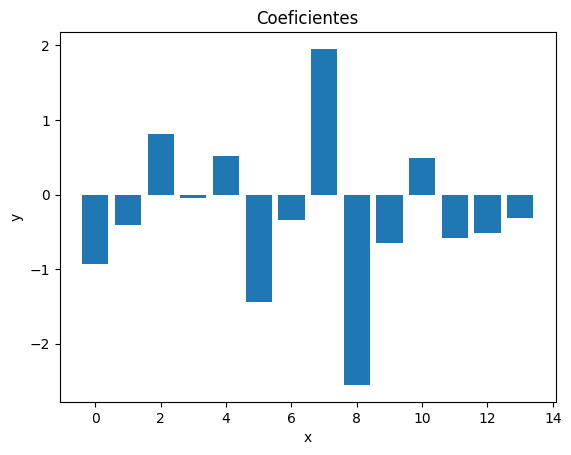

In [232]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [233]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.5       , 0.        , 0.        , ..., 0.38658646, 0.25      ,
        0.25      ],
       [0.66666667, 0.        , 0.        , ..., 0.19875799, 0.5       ,
        0.33333333],
       [0.25      , 0.25      , 0.        , ..., 0.07206616, 0.33333333,
        0.25      ],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.24503994, 0.33333333,
        0.33333333],
       [1.        , 0.        , 0.        , ..., 0.99999997, 1.        ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 0.99999997, 0.5       ,
        0.5       ]])

In [234]:
X_test.shape

(9818, 14)

In [235]:
predictions = model.predict(X_test)

In [236]:
test["predictions"]=predictions
test

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predictions
0,0.500000,0.000000,0,0,0.200890,0.208485,1,0,0,0.285714,1.000000,0.386586,0.250000,0.250000,neutral,0
1,0.666667,0.000000,0,0,0.581832,0.608876,0,0,0,0.142857,0.918296,0.198758,0.500000,0.333333,entailment,2
2,0.250000,0.250000,0,0,0.237352,0.194148,0,1,1,0.142857,2.000000,0.072066,0.333333,0.250000,contradiction,2
3,1.000000,0.000000,0,0,4.381176,0.644971,1,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,neutral,1
4,0.666667,0.333333,0,0,4.413306,0.778108,0,1,0,0.000000,0.918296,0.000000,0.500000,0.333333,entailment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0.400000,0.000000,0,0,0.368725,0.359657,0,0,2,0.250000,1.521928,0.447986,0.333333,0.200000,contradiction,2
9814,1.000000,0.000000,0,0,4.141572,0.700668,2,0,0,0.000000,0.000000,1.000000,0.333333,0.000000,entailment,1
9815,0.333333,0.000000,0,0,0.298806,0.305267,0,0,0,0.250000,0.918296,0.245040,0.333333,0.333333,contradiction,0
9816,1.000000,0.000000,0,0,4.673955,1.000000,0,0,0,0.000000,0.000000,1.000000,1.000000,0.666667,entailment,1


In [237]:
test[(test["clases"]=="entailment") & (test["predictions"]==0)].head(10)

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predictions
4,0.666667,0.333333,0,0,4.413306,0.778108,0,1,0,0.000000,0.918296,0.000000,0.500000,0.333333,entailment,0
10,0.333333,0.000000,1,0,0.306007,0.213775,0,0,1,0.750000,1.459148,0.548686,0.500000,0.333333,entailment,0
33,0.500000,0.000000,0,0,0.441242,0.447643,0,0,0,0.166667,1.000000,0.216828,0.500000,0.000000,entailment,0
146,0.500000,0.000000,0,0,0.032465,0.115414,1,0,0,0.166667,1.000000,0.085279,0.000000,0.500000,entailment,0
155,0.750000,0.250000,0,0,4.422192,0.800769,0,1,0,0.000000,0.811278,0.000000,0.666667,0.250000,entailment,0
160,0.600000,0.200000,1,0,3.387795,0.548286,1,1,0,0.076923,1.370951,0.000000,0.333333,0.600000,entailment,0
174,0.333333,0.333333,0,0,3.760663,0.236388,1,1,1,0.000000,1.584963,0.000000,0.000000,0.000000,entailment,0
225,0.666667,0.000000,0,0,0.310453,0.362092,1,0,0,0.250000,0.918296,0.471299,0.000000,0.333333,entailment,0
234,0.500000,0.500000,0,0,3.830747,0.317546,1,1,0,0.000000,1.000000,0.000000,0.000000,0.000000,entailment,0
242,0.666667,0.000000,0,0,-0.049124,0.102671,2,0,0,0.125000,0.918296,0.333443,0.000000,0.000000,entailment,0


In [238]:

test[(test["clases"]=="neutral") & (test["predictions"]==2)].head(60)

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predictions
7,0.800000,0.000000,0,0,0.551129,0.690944,1,0,0,0.166667,0.721928,0.051190,0.600000,0.800000,neutral,2
9,0.200000,0.000000,0,0,0.183287,0.172007,0,0,1,0.750000,1.370951,0.445449,0.250000,0.200000,neutral,2
17,0.666667,0.000000,0,0,0.330932,0.404910,1,0,0,0.200000,0.918296,-0.029637,0.333333,0.000000,neutral,2
23,0.750000,0.000000,0,0,-0.030442,0.128172,3,0,0,0.090909,0.811278,0.236515,0.000000,0.500000,neutral,2
24,0.875000,0.000000,0,0,0.005605,0.131252,6,0,0,0.125000,0.543564,0.515233,0.000000,0.250000,neutral,2
36,0.857143,0.000000,0,0,0.554070,0.542952,2,0,0,0.200000,0.591673,0.302360,0.500000,0.571429,neutral,2
44,0.888889,0.111111,0,0,4.194095,0.667460,4,1,0,0.000000,0.503258,0.000000,0.200000,0.444444,neutral,2
45,0.400000,0.000000,0,0,0.134449,0.266614,1,0,1,0.400000,1.521928,0.233777,0.250000,0.200000,neutral,2
50,0.714286,0.000000,0,0,0.327336,0.316115,3,0,0,0.250000,0.863121,0.175283,0.250000,0.428571,neutral,2
53,0.600000,0.000000,0,0,0.528917,0.436078,0,0,1,0.142857,1.370951,0.412352,0.333333,0.600000,neutral,2


In [239]:
test[(test["clases"]=="contradiction") & (test["predictions"]==0)].head(60)

,entail,contra,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predictions
5,0.500000,0.500000,0,0,4.440310,0.539767,0,1,0,0.000000,1.000000,0.000000,0.000000,0.000000,contradiction,0
8,0.666667,0.333333,0,0,4.139124,0.659479,1,1,0,0.000000,0.918296,0.000000,0.250000,0.333333,contradiction,0
15,0.750000,0.250000,0,0,4.246436,0.757936,1,1,0,0.000000,0.811278,0.000000,0.333333,0.250000,contradiction,0
21,0.666667,0.333333,0,0,4.185687,0.604849,1,1,0,0.000000,0.918296,0.000000,0.250000,0.333333,contradiction,0
25,0.333333,0.000000,0,0,0.307556,0.306059,0,0,0,0.250000,0.918296,0.363877,0.500000,0.333333,contradiction,0
29,0.333333,0.333333,0,0,0.240322,0.312129,0,1,0,0.250000,1.584963,0.308229,0.000000,0.333333,contradiction,0
35,0.333333,0.333333,0,0,0.298337,0.323814,0,1,0,0.166667,1.584963,0.110650,0.333333,0.000000,contradiction,0
64,0.750000,0.250000,0,0,4.434180,0.842101,0,1,0,0.000000,0.811278,0.000000,0.750000,0.500000,contradiction,0
68,0.666667,0.000000,0,0,0.089330,0.170897,2,0,0,0.250000,0.918296,0.332579,0.000000,0.000000,contradiction,0
71,0.666667,0.000000,0,0,0.719106,0.587882,0,0,0,0.166667,0.918296,0.381620,0.333333,0.333333,contradiction,0


In [240]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[2164  745  457]
 [ 556 1629 1032]
 [ 460 1092 1683]]


In [ ]:
# [[2179  722  465]
#  [ 579 1560 1078]
#  [ 462 1053 1720]]

In [ ]:
# [[1727 1388  251]
#  [ 294 2251  672]
#  [ 311 1435 1489]]
# [[2055 1018  293]
#  [ 454 2123  640]
#  [ 394 1415 1426]]
# [[1825 1302  239]
#  [ 300 2269  648]
#  [ 297 1471 1467]]
# [[1749 1293  324]
#  [ 311 2390  516]
#  [ 320 1617 1298]]

In [241]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="micro"),2))
print("recall",round(recall_score(y_test,predictions,average="micro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="micro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.56
recall 0.56
f1_score:  0.56
matthews_score:  0.34


In [122]:
# acccuracy:  0.56
# precision:  0.6
# recall 0.56
# f1_score:  0.56
# matthews_score:  0.35

In [242]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.56
recall 0.56
f1_score:  0.56
matthews_score:  0.34


In [243]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.56
recall 0.56
f1_score:  0.56
matthews_score:  0.34


In [244]:
X_train.shape

(549367, 14)

In [245]:
X_test.shape

(9818, 14)

In [246]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [247]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [248]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.550000 (0.002146)


In [74]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.570000 (0.015220)


In [75]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg = "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Recall:: 0.570000 (0.012470)
Logistic Regression F1-score:: 0.570000 (0.014008)


In [76]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

In [130]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.550000 (0.002201)
Logistic Regression Recall:: 0.550000 (0.002201)
Logistic Regression F1-score:: 0.550000 (0.002201)


In [131]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.330000 (0.004682)


In [132]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [66]:
#linear_model

In [67]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [133]:
y_predict = model.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.58      0.48      0.53      3235
           1       0.63      0.70      0.66      3366
           2       0.48      0.51      0.50      3217

    accuracy                           0.57      9818
   macro avg       0.56      0.56      0.56      9818
weighted avg       0.57      0.57      0.56      9818

[[1563  598 1074]
 [ 339 2358  669]
 [ 803  776 1638]]


In [ ]:
#            0       0.62      0.46      0.53      3235
#            1       0.74      0.51      0.61      3366
#            2       0.44      0.70      0.54      3217

#     accuracy                           0.56      9818
#    macro avg       0.60      0.56      0.56      9818
# weighted avg       0.60      0.56      0.56      9818

# [[1489  311 1435]
#  [ 251 1727 1388]
#  [ 672  294 2251]]

In [ ]:
#   precision    recall  f1-score   support

#            0       0.58      0.28      0.38      3235
#            1       0.71      0.59      0.65      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.54      9818
#    macro avg       0.58      0.54      0.53      9818
# weighted avg       0.58      0.54      0.53      9818
#  precision    recall  f1-score   support

#            0       0.58      0.28      0.38      3235
#            1       0.71      0.59      0.65      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.54      9818
#    macro avg       0.58      0.54      0.53      9818
# weighted avg       0.58      0.54      0.53      9818

In [ ]:
#               precision    recall  f1-score   support

#            0       0.59      0.29      0.39      3235
#            1       0.72      0.59      0.64      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.55      9818
#    macro avg       0.59      0.55      0.53      9818
# weighted avg       0.59      0.55      0.54      9818

In [273]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [274]:
test.columns[:-2]

Index(['distancias', 'entropias', 'mutinf', 'max_info', 'sumas', 'entail',
       'contra', 'neutral', 'no_match', 'rel_conceptuales', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [275]:
explainer.expected_value

array([-0.84874776, -0.93805858, -0.7247547 ])

In [276]:
X_test

array([[0.94136514, 0.20403559, 0.04231446, ..., 0.        , 0.        ,
        0.25      ],
       [0.93789501, 0.35089905, 0.11888399, ..., 0.        , 0.        ,
        0.5       ],
       [0.87472931, 0.32523871, 0.03928154, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.93915162, 0.19086587, 0.06105406, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.62013063, 0.95501503, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.72757326, 0.84252027, ..., 0.        , 0.        ,
        0.5       ]])

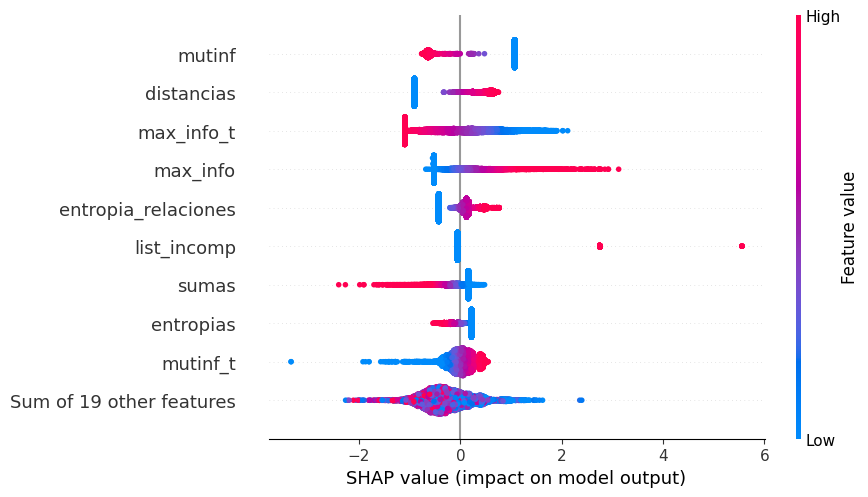

In [74]:
shap.plots.beeswarm(shap_values[:,:,0])

In [94]:
shap_values

.values =
array([[[ 0.65533106,  0.20698347, -0.6274937 ],
        [-0.00651386,  0.00254711, -0.0202789 ],
        [-0.05534794,  0.01460769,  0.04602571],
        ...,
        [-0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ],
        [ 0.05461241, -0.05102555, -0.00680332]],

       [[ 0.649568  ,  0.20516324, -0.62197545],
        [ 0.03398262, -0.01328822,  0.10579443],
        [-0.20949088,  0.05528984,  0.1742064 ],
        ...,
        [-0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ],
        [-0.04606004,  0.04303489,  0.00573791]],

       [[ 0.54466478,  0.17203001, -0.52152834],
        [ 0.00904271, -0.00353597,  0.02815169],
        [-0.05741733,  0.01515386,  0.04774655],
        ...,
        [-0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ],
        [ 0.02105492, -0.01967207, -0.00262291]],

       ...,

       [[ 0.65165493,  0.20582238, -0.62397372],
 

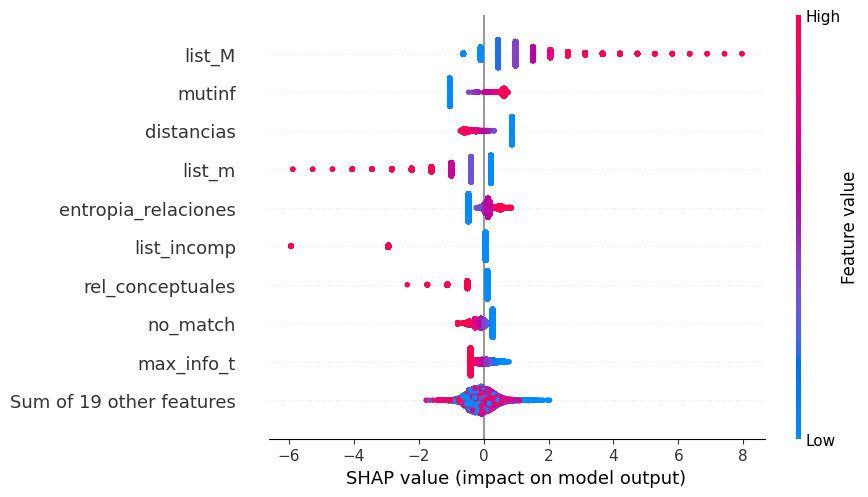

In [95]:
shap.plots.beeswarm(shap_values[:,:,2])

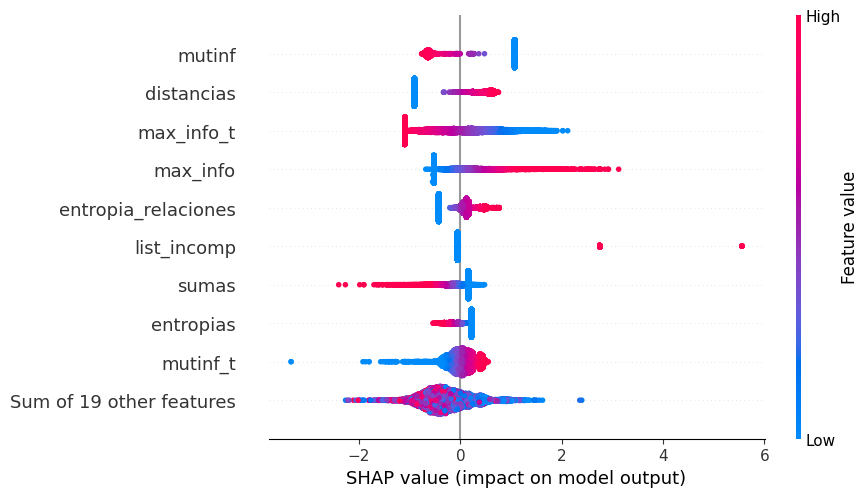

In [96]:
shap.plots.beeswarm(shap_values[:,:,0])

In [63]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.23912561 0.52693283 0.09193841 0.81246962 0.1        0.01923077
 0.33333333 0.17647059 0.11111111 0.46428571 0.66666667 0.
 0.         0.25      ] 0 0


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

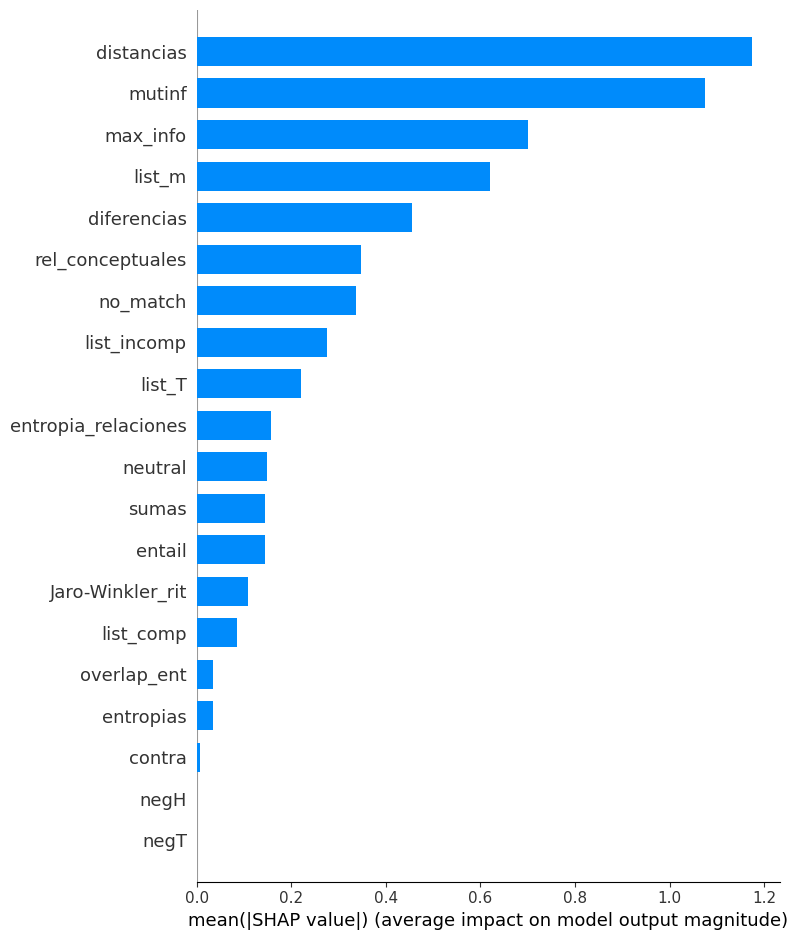

In [277]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

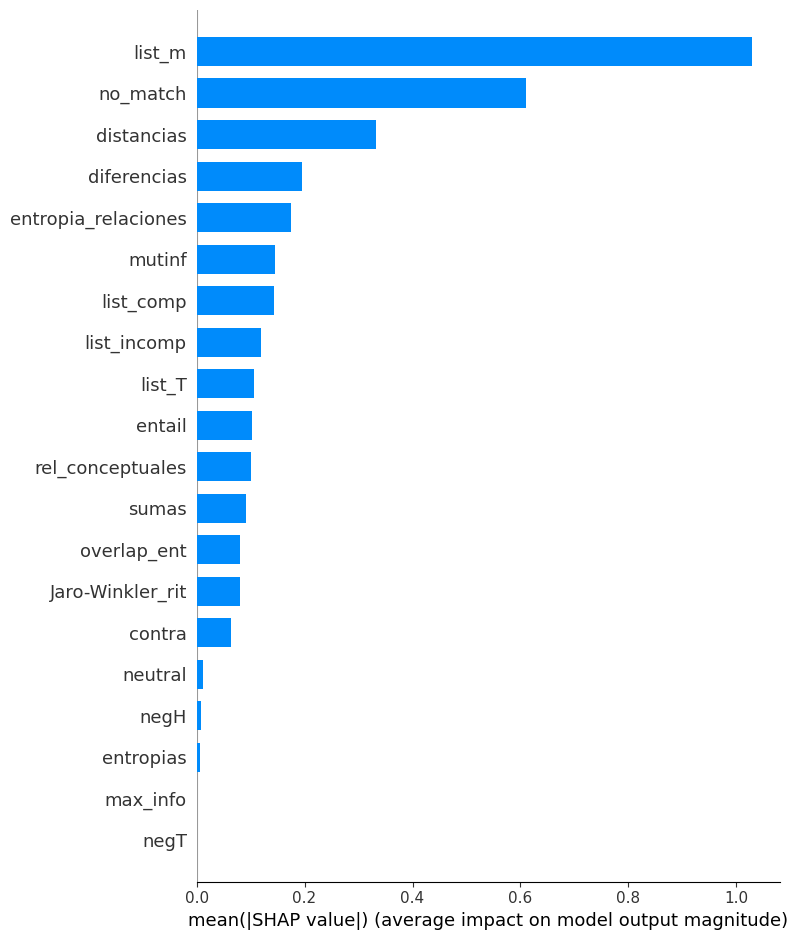

In [278]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

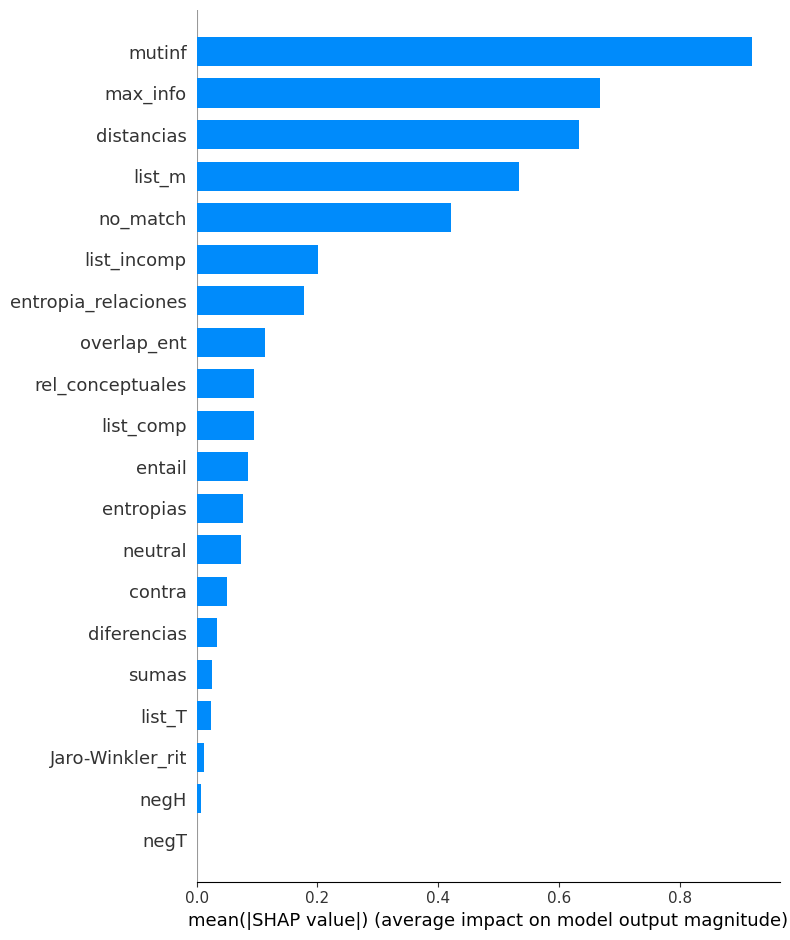

In [280]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

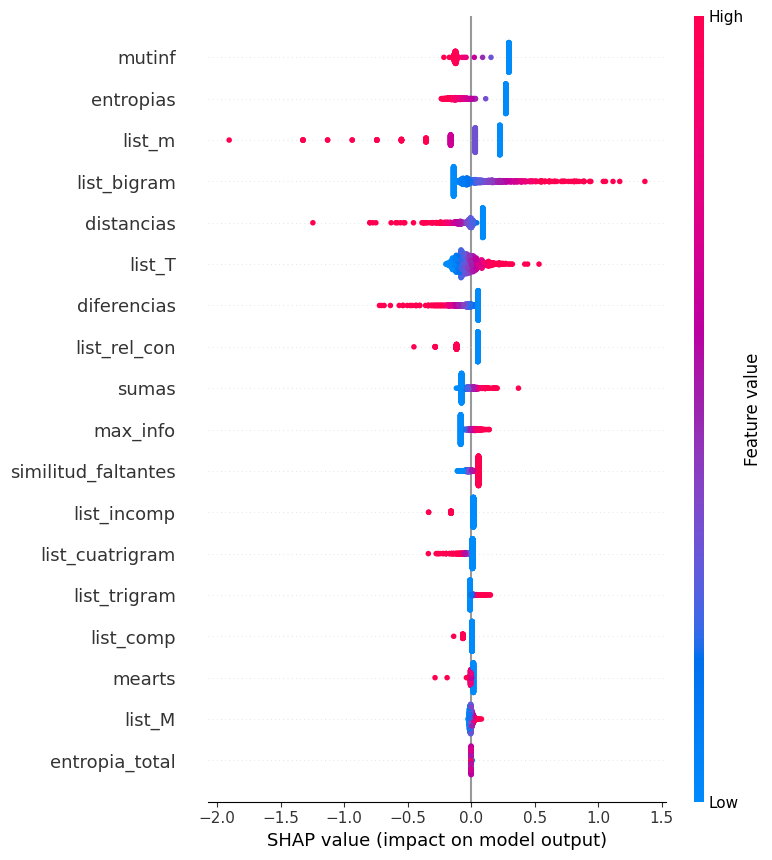

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

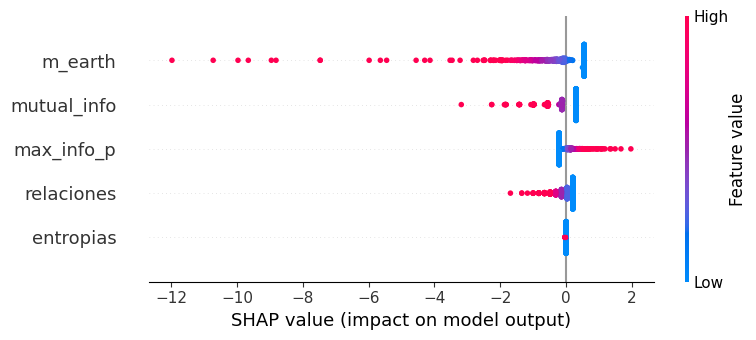

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

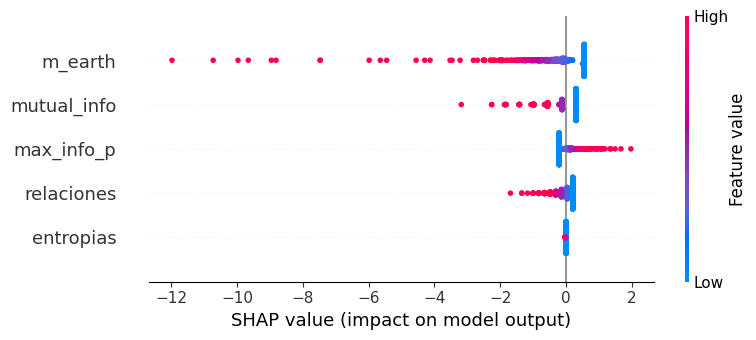

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


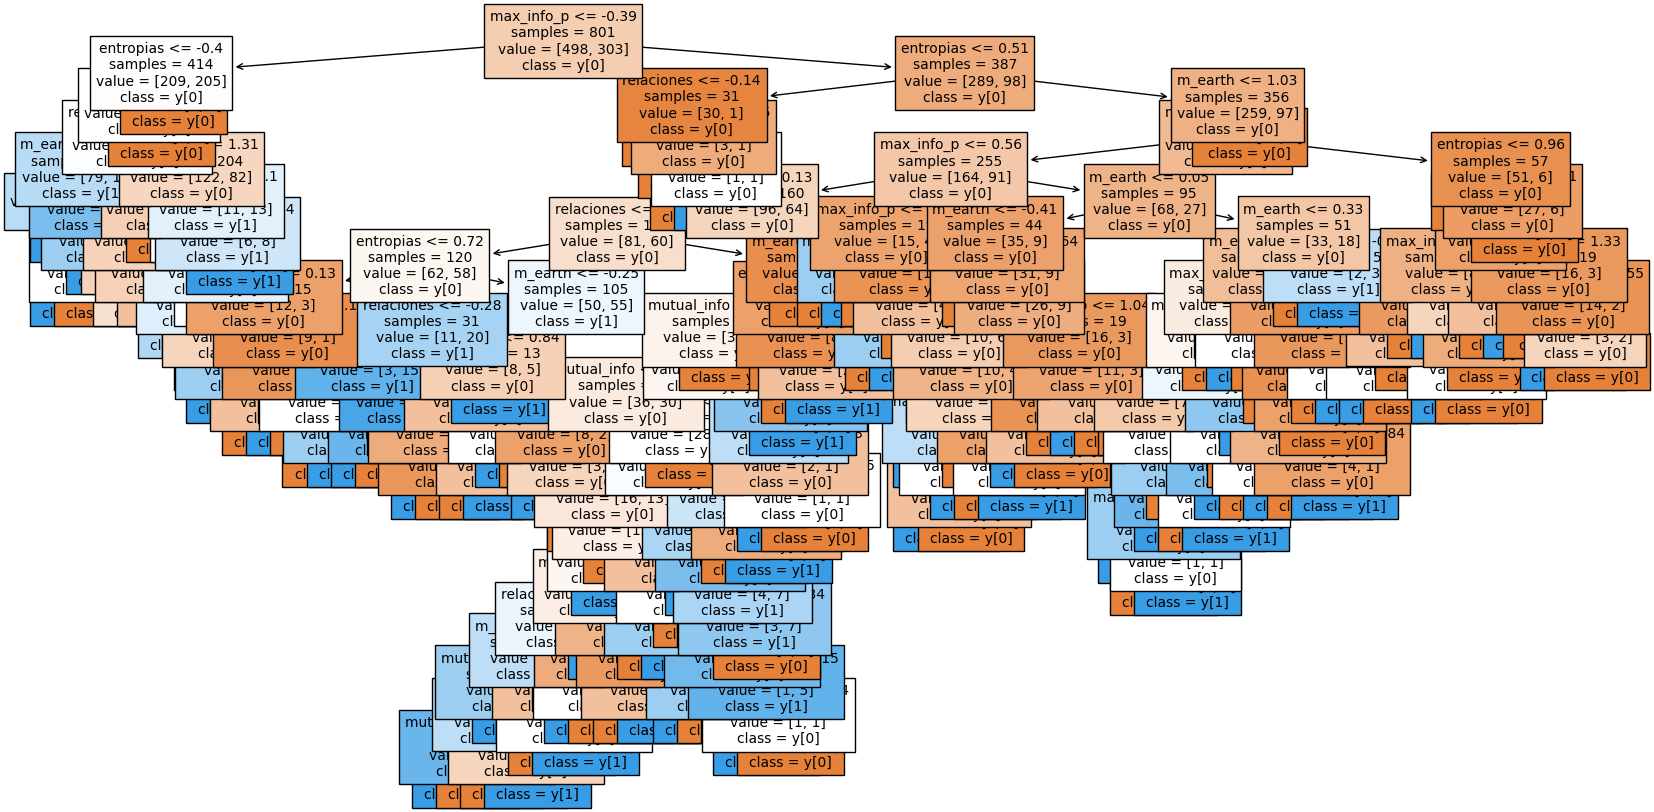

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )